## Observations and Insights 

Three significant things of note about the dataset:

1. At a casual glance, the metrics would indicate a wide margin of success for Capomulin and Ramicane above the other 8 drug regimens in the sample. Most importantly, they demonstrate a clear extension of subject lifespan as there are far more timepoints collected.

2. Some caution should be taken when considering the overall mouse tumor volume as it has a very strong correlation with the mouse's weight. Big mouse trends towards big cancer. Additional parsing to determine percentage of decline in a given tumor for a given regimen would be in order.

3. Another vital datapoint that was not considered in this excercise was metastatic sites. Certain drugs may be very effective at reducing a given tumor, but if the cancer persists in the body, the regimen's application will be very limited. This, as well as type of cancer, and the variablity in results for sex should be taken into consideration. 
For instance, metastatic ovarian or testicular cancer among a subject population could skew results as well as provide insight for future human trialing. Fortunately, the population was very close on male vs female quantities.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
path_mouse_metadata = "data/Mouse_metadata.csv"
path_study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(path_mouse_metadata)
study_results = pd.read_csv(path_study_results)

# Combine the data into a single dataset
merged_data_df = study_results.merge(mouse_metadata,)
# Display the data table for preview

merged_data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = len(pd.unique(merged_data_df['Mouse ID']))

num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
mouse_counts = merged_data_df['Mouse ID'].value_counts()
dupemouse = mouse_counts.index[0]

#return the duped mouse's ID
dupemouse

'g989'

In [4]:
#show the duped mouse's dataframe
duped_df = merged_data_df.loc[lambda merged_data_df: merged_data_df['Mouse ID']==dupemouse]
                              
duped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#first set the multi-index of the merged dataframe
merged_data_df.set_index(['Mouse ID','Drug Regimen'],inplace=True)

#remove all values that use the duped mouse's ID
merged_data_df.drop(labels=dupemouse,level=0, inplace=True)

#verify that the dupelicated mouse was removed
dupemouse in merged_data_df.index

False

In [6]:
# Checking the number of mice in the clean DataFrame. New check also counts the index, so we need to remove one manually
num_mice = len(pd.unique(merged_data_df.index.levels[0]))

num_mice-1

248

In [7]:
#show the new table
merged_data_df.head(10)
#reset the dataframes index for manipulation post-display
merged_data_df.reset_index(inplace=True)

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and Standard Error of Mean of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#pull the relevant columns out of the clean dataframe
tumor_volume_df = merged_data_df[['Drug Regimen','Tumor Volume (mm3)']]
grouped_drugs = tumor_volume_df.groupby(['Drug Regimen'])

#generate the values
means =  grouped_drugs['Tumor Volume (mm3)'].mean()
medians = grouped_drugs['Tumor Volume (mm3)'].median()
variance = grouped_drugs['Tumor Volume (mm3)'].var()
stdev = grouped_drugs['Tumor Volume (mm3)'].std()
sem = grouped_drugs['Tumor Volume (mm3)'].sem()

#create the dataframe
summ_stat_drug = {'Mean':means,
                 'Median':medians,
                 'Variance':variance,
                 'STDev':stdev,
                 'SEM':sem}
summary_df = pd.DataFrame(summ_stat_drug)

#print the dataframe
summary_df

,Mean,Median,Variance,STDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merged_data_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

#print the dataframe
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

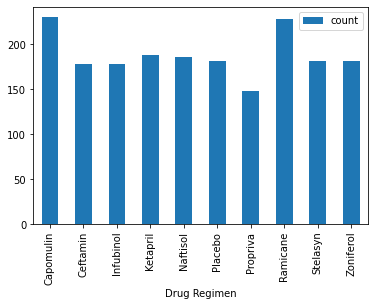

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import numpy as np

#pull the relevant data
summary_timepoint_df = merged_data_df.groupby(['Drug Regimen']).agg({'Timepoint':['count']})
summary_timepoint_df.reset_index(inplace=True)
#plot the data
summary_timepoint_df.plot(x='Drug Regimen',y='Timepoint',kind='bar')

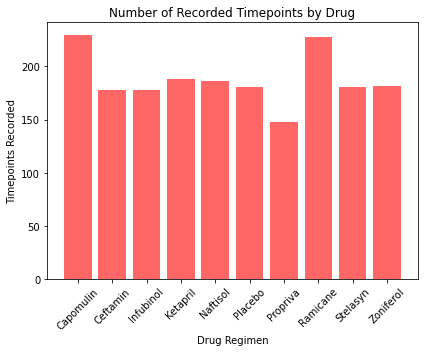

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#establish variables to define the plot space
x_axis = np.arange(len(summary_timepoint_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,5))

#put the data into the plot
plt.bar(x_axis, summary_timepoint_df['Timepoint']['count'],color='r',alpha=.6)

#label the plot
plt.title("Number of Recorded Timepoints by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Recorded")
plt.xticks(tick_locations, summary_timepoint_df['Drug Regimen'], rotation=45)
plt.tight_layout()
plt.show()

array([<AxesSubplot:ylabel='(Mouse ID, count)'>], dtype=object)

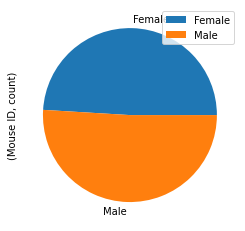

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summary_sex_df = merged_data_df.groupby(['Sex']).agg({'Mouse ID':['count']})

summary_sex_df.plot(kind='pie',subplots=True)

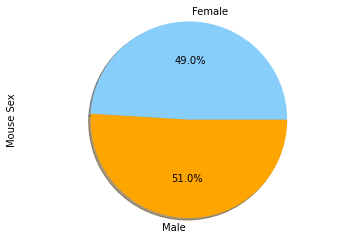

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(summary_sex_df['Mouse ID']['count'],labels=summary_sex_df.index, colors=['lightskyblue','orange'],
        autopct="%1.1f%%", shadow=True)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel('Mouse Sex')
#print the final product to the screen
plt.show()

# Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousepoint = merged_data_df.groupby(['Mouse ID']).agg({'Timepoint':['max']})
mousepoint.columns = mousepoint.columns.droplevel(1)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mousepoint_2 = pd.merge(mousepoint, merged_data_df,how='left',left_on=['Mouse ID','Timepoint'],right_on=['Mouse ID','Timepoint'])
mousepoint_2 = mousepoint_2[mousepoint_2['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]


# Put treatments into a list for for loop (and later for plot labels)
treatment_list = mousepoint_2['Drug Regimen'].unique()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q3,median,q1 = np.percentile(mousepoint_2['Tumor Volume (mm3)'],[75,50,25])
iqr = q3 - q1
outly = iqr*1.5
u = outly + q3
l = q1 - outly

#print the outlier statistics
print(f"The lower quartile of tumor volume is: {q1}")
print(f"The upper quartile of tumor volume is: {q3}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {median} ")
lower_bound = l
upper_bound = u
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#print outliers dataframe
outliers_df = mousepoint_2[(mousepoint_2['Tumor Volume (mm3)'] < l) | (mousepoint_2['Tumor Volume (mm3)'] > u)] 
outliers_df

The lower quartile of tumor volume is: 37.1877438025
The upper quartile of tumor volume is: 59.930261755
The interquartile range of tumor volume is: 22.742517952499995
The the median of tumor volume is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)


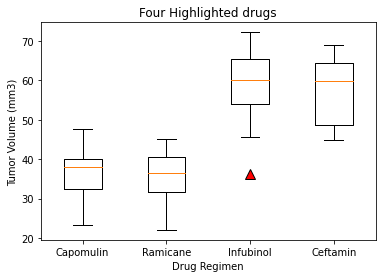

In [16]:
#create lists for the focus drugs data
tumor_Capomulin = mousepoint_2[mousepoint_2['Drug Regimen'].isin(['Capomulin'])]
tumor_Ramicane = mousepoint_2[mousepoint_2['Drug Regimen'].isin(['Ramicane'])]
tumor_Infubinol = mousepoint_2[mousepoint_2['Drug Regimen'].isin(['Infubinol'])]
tumor_Ceftamin = mousepoint_2[mousepoint_2['Drug Regimen'].isin(['Ceftamin'])]

# Generate a box plot of the final tumor volume of each mouse across the four regimens of interest
data_boxplot = [tumor_Capomulin['Tumor Volume (mm3)'],tumor_Ramicane['Tumor Volume (mm3)'],
               tumor_Infubinol['Tumor Volume (mm3)'],tumor_Ceftamin['Tumor Volume (mm3)']]
fig1, ax1 = plt.subplots()
ax1.set_title('Four Highlighted drugs')
ax1.boxplot(data_boxplot,flierprops={'marker': '^', 'markersize': 10, 'markerfacecolor': 'red'})
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])

plt.show()

## Line and Scatter Plots

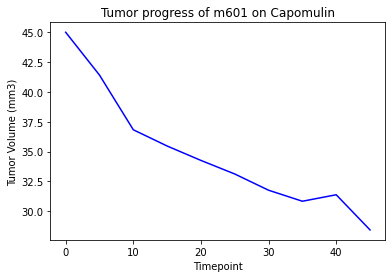

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#pull relevant data from first merged dataframe
capomulin_data_df = merged_data_df[merged_data_df['Drug Regimen'].isin(['Capomulin'])]

m601_data = capomulin_data_df[capomulin_data_df['Mouse ID'].isin(['m601'])]

#m601_data
timepoints = m601_data['Timepoint']
Tumor_Volume =m601_data['Tumor Volume (mm3)']

#format and label the chart
plt.title('Tumor progress of m601 on Capomulin')
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')
plt.plot(timepoints,Tumor_Volume,color='blue',label='Tumor Size')

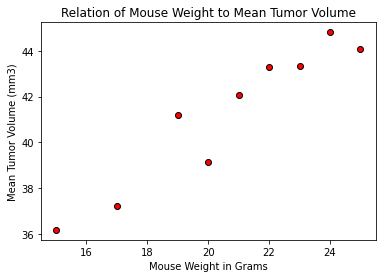

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#capomulin_data_df
size_comp = capomulin_data_df.groupby(['Weight (g)']).agg({'Tumor Volume (mm3)':['mean']})
size_comp.reset_index(inplace=True)
size_comp.columns.droplevel(1)
weight = size_comp['Weight (g)']
avg_tumor_vol = size_comp['Tumor Volume (mm3)']['mean']

plt.scatter(weight,avg_tumor_vol,marker='o',facecolors='red',edgecolors='black')
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Relation of Mouse Weight to Mean Tumor Volume')

plt.show()

## Correlation and Regression

The correlation factor between mouse weight and tumor volume is 0.95


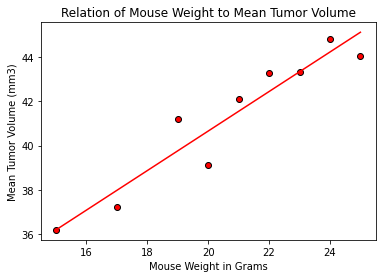

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#reestablish plot variables
size_comp = capomulin_data_df.groupby(['Weight (g)']).agg({'Tumor Volume (mm3)':['mean']})
size_comp.reset_index(inplace=True)
size_comp.columns.droplevel(1)
weight = size_comp['Weight (g)']
avg_tumor_vol = size_comp['Tumor Volume (mm3)']['mean']

#calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.plot(weight,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color='blue')

#rebuild the plot
plt.scatter(weight,avg_tumor_vol,marker='o',facecolors='red',edgecolors='black')

#label the plot
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Relation of Mouse Weight to Mean Tumor Volume')
correlation = st.pearsonr(weight,avg_tumor_vol)

print(f'The correlation factor between mouse weight and tumor volume is {round(correlation[0],2)}')
plt.show()